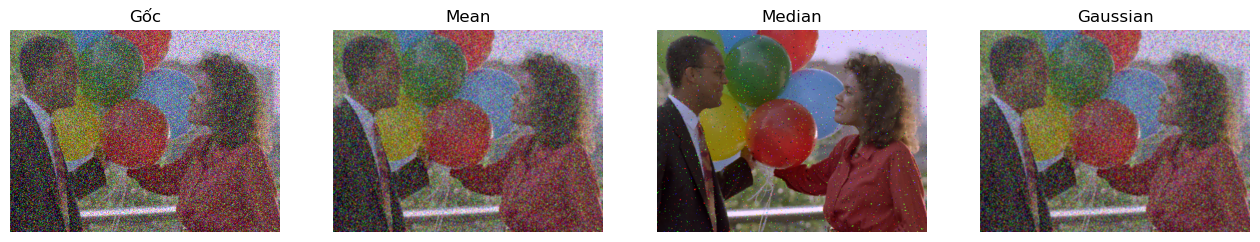

In [34]:
import numpy as np
import imageio.v2 as iio
import os
from glob import glob
from scipy.ndimage import uniform_filter, median_filter, gaussian_filter
import matplotlib.pyplot as plt

# Đường dẫn tới thư mục chứa ảnh
folder = './exercise'  # Đổi lại nếu cần

# Lấy danh sách các file ảnh (jpg, png)
image_files = glob(os.path.join(folder, '*.jpg')) + glob(os.path.join(folder, '*.png'))

# Tạo thư mục lưu kết quả nếu chưa có
output_folder = './exercise_filtered'
os.makedirs(output_folder, exist_ok=True)

# Kích thước kernel
ksize = 3

for file in image_files:
    img = iio.imread(file)
    # Nếu ảnh màu, áp dụng filter cho từng kênh
    if img.ndim == 3:
        mean_img = np.zeros_like(img)
        median_img = np.zeros_like(img)
        gauss_img = np.zeros_like(img)
        for c in range(3):
            mean_img[..., c] = uniform_filter(img[..., c], size=ksize)
            median_img[..., c] = median_filter(img[..., c], size=ksize)
            gauss_img[..., c] = gaussian_filter(img[..., c], sigma=1)
    else:
        mean_img = uniform_filter(img, size=ksize)
        median_img = median_filter(img, size=ksize)
        gauss_img = gaussian_filter(img, sigma=1)

    # Lưu ảnh đã lọc
    base = os.path.splitext(os.path.basename(file))[0]
    iio.imwrite(os.path.join(output_folder, f'{base}_mean.png'), mean_img)
    iio.imwrite(os.path.join(output_folder, f'{base}_median.png'), median_img)
    iio.imwrite(os.path.join(output_folder, f'{base}_gauss.png'), gauss_img)

    # Hiển thị so sánh
    fig, axs = plt.subplots(1, 4, figsize=(16, 4))
    axs[0].imshow(img, cmap='gray' if img.ndim==2 else None)
    axs[0].set_title('Gốc')
    axs[0].axis('off')
    axs[1].imshow(mean_img, cmap='gray' if img.ndim==2 else None)
    axs[1].set_title('Mean')
    axs[1].axis('off')
    axs[2].imshow(median_img, cmap='gray' if img.ndim==2 else None)
    axs[2].set_title('Median')
    axs[2].axis('off')
    axs[3].imshow(gauss_img, cmap='gray' if img.ndim==2 else None)
    axs[3].set_title('Gaussian')
    axs[3].axis('off')
    plt.show()

